# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [173]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [214]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


TypeError: x_d() missing 1 required positional argument: 'T'

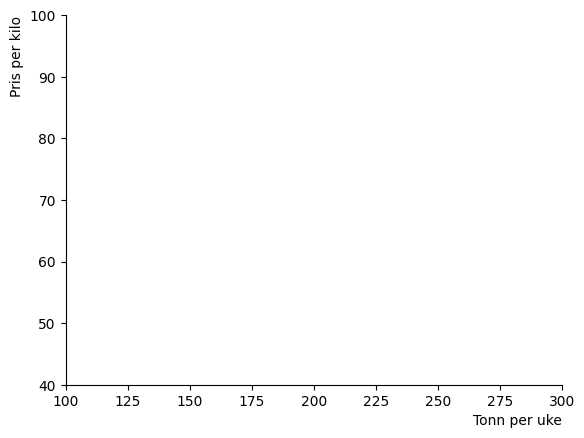

In [249]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(100,300))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


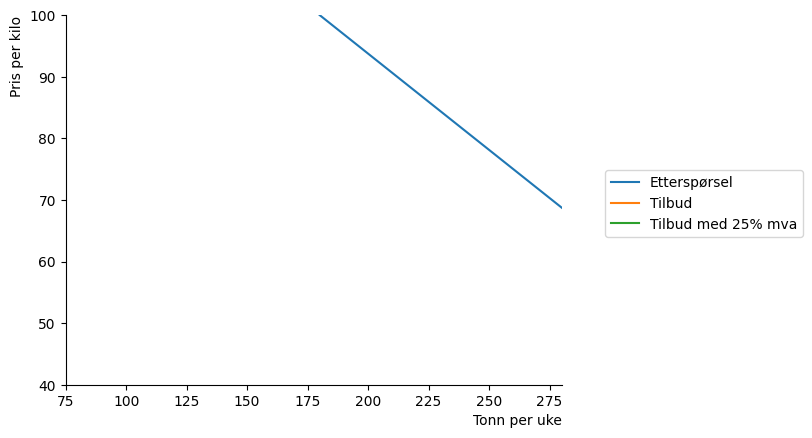

In [230]:
#Oppgaave 1

#Lager plot
fig, ax = create_ax()

# Plotter funksjonene
ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

# Definerer tilbud med mva
x_s_mva = x_s(p_num, 0.25)

# Plotter tilbud med mva
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

# Legende
ax.legend(bbox_to_anchor=(1.5,0.6));

# Figuren for tilbud med mva er brattere fordi den kompanserer for prosentøkningen

In [233]:
#Oppgave 2

def x_d(p,T):
    return 500 - 3.2*p*(1+T)

def x_s(p,t):
    return -100+4.3*p*(1-t)

In [251]:
#Oppgave 2

x, p, t, T = sp.symbols('x p t T')

condition = sp.Eq(x_d(p,T),x_s(p,t))

p_eq=sp.solve(condition,p)

#Løser likningen for p
p_eq


[6000.0/(32.0*T - 43.0*t + 75.0)]

In [252]:
# Finner kvantum
x_eq = x_s(p_eq[0],t)
x_eq

25800.0*(1 - t)/(32.0*T - 43.0*t + 75.0) - 100

In [253]:
# Pris uten MVA 
p_eq_fun=sp.lambdify((t,T), p_eq[0])

p_eq_fun(0,0)

80.0

In [254]:
# Mengde uten MVA
x_eq_fun = sp.lambdify((t,T), x_eq)

x_eq_fun(0,0)

244.0

In [255]:
# Pris med MVA
p_eq_fun(0.25,0)

93.3852140077821

In [256]:
# Mengde med MVA
x_eq_fun(0.25,0)

201.16731517509726

In [307]:
x_round = round(x_eq_fun(0.25,0),2)
x_round

201.17

In [310]:
x_2_round = round(x_eq_fun(0,0.25),2)
x_2_round

210.84

In [322]:
y_round = round(p_eq_fun(0.25,0),2)
y_round

93.39

In [328]:
y_2_round = round(p_eq_fun(0,0.25),2)
y_2_round

72.29

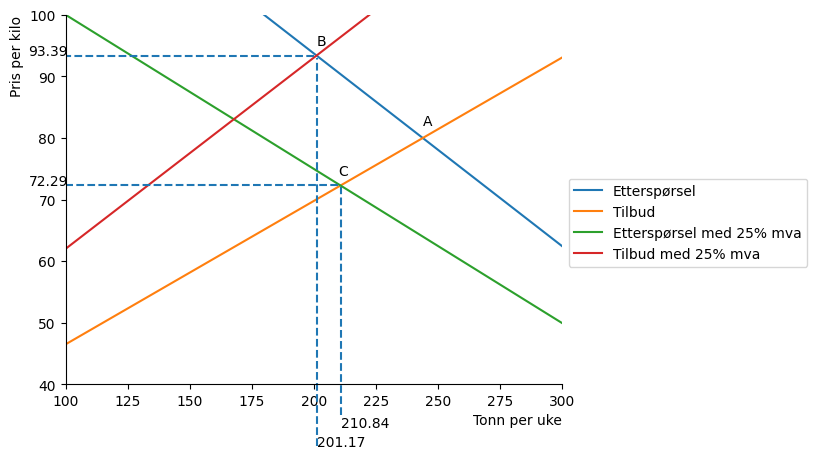

In [377]:
#Lager plot
fig, ax = create_ax()

# Plotter funksjonene
ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

# Plotter tilbud med mva
ax.plot(x_d(p_num, 0.25),p_num, label='Etterspørsel med 25% mva')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

#Markerer likevektene
ax.vlines(x_eq_fun(0.25,0),30, 93, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fun(0,0.25),35,72, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fun(0.25,0),200,100, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fun(0,0.25),210,100, linestyles='dashed', clip_on=False)

#Annoterer likevektene
ax.annotate(x_round, xy = (x_round,30), annotation_clip=False)
ax.annotate(x_2_round, xy = (x_2_round,33), annotation_clip=False)
ax.annotate(y_round, xy = (85,y_round), annotation_clip=False)
ax.annotate(y_2_round, xy = (85,y_2_round), annotation_clip=False)

# Tekst
ax.text(244, 82, "A")
ax.text(201, 95, "B")
ax.text(210, 74, "C")

# Legende
ax.legend(bbox_to_anchor=(1,0.3));



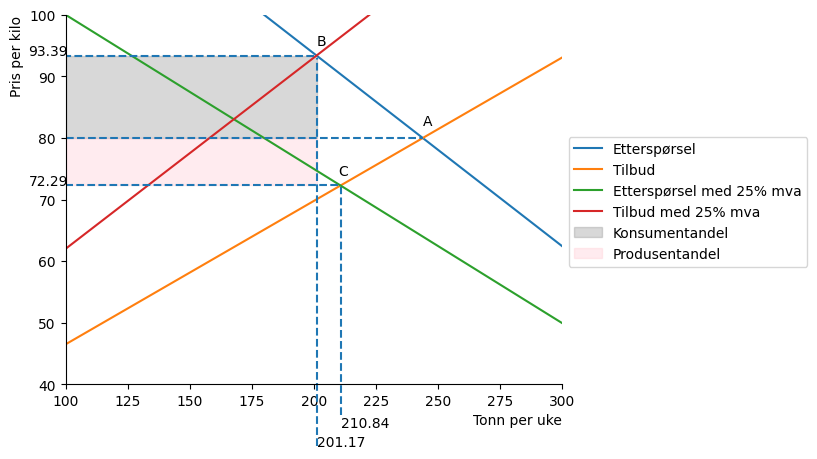

In [378]:
#Oppgave 3

q=np.linspace (100, x_eq_fun(0.25,0), 100)

ax.hlines(p_eq_fn(0,0),100,x_eq_fun(0,0), linestyles='dashed')

ax.fill_between(q,y_round,80, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,80,y_2_round, color = "pink",alpha = 0.3,label='Produsentandel')

ax.legend(bbox_to_anchor=(1,0.3));

fig

In [380]:
Stat_avgift_inntekt = y_round-80
Stat_avgift_inntekt

13.39

Vi kan se at staten får en inntekt på [stat_avgift_inntekt]. 

Vi kan se at at konsumentene er de som tar den største andelen av avgiften. Mens produsentene betaler mindre.

Oppgave 4

Merverdiavgift er en avgift som legges på de fleste produkter du kjøper, derfor er dette en viktig inntektskilde for staten, og gir store summer. Ulempen er at den kan øke prisene for nødvendige goder som allerede er høyt priser, mat blant annet

Stykkprisavgift kan dempe etterspørselen som vi tenker ikke er nødvendige, eller som bidrar til økt belastning ovenfor staten i andre sektorer. Blant annet alkohol, eller biler. Samtidig gjør det slik at konsumenter velger å kjøpe brennvin med mindre alkoholprosent, eller biler som ikke er tunge, og forrurenser mye. Ulempen er at de blir en høyere innstegspris for konsumenten når de først skal ha et produkt. Det er for eksempel mye dyrere å kjøpe en elbil (som er mer miljøvennlig), grunnet dens høye egenvekt. 